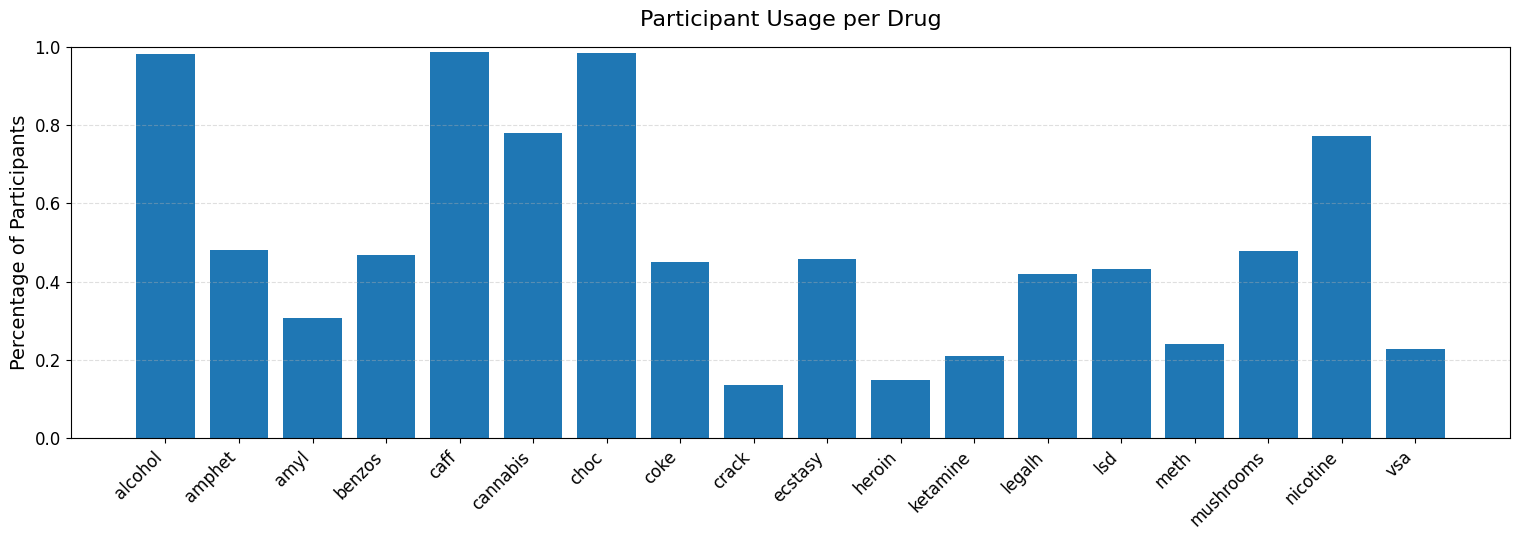

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("drug_consumption.csv")

drug_cols = [
    "alcohol","amphet","amyl","benzos","caff","cannabis","choc","coke","crack",
    "ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","vsa"
]

# Everything from CL1-CL6 is considered a user, anything CL0 is a non-user
user_cols = [f"{c}_user" for c in drug_cols]
df[user_cols] = (df[drug_cols] != "CL0").astype(int)

def prevalence_table(df, base_cols):
    rows = []
    for col in base_cols:
        b = f"{col}_user"
        s = df[b]
        n = int(s.size)
        users = int((s == 1).sum())
        non_users = int((s == 0).sum())
        pct = users / n if n else np.nan
        rows.append({"drug": col, "n": n, "users": users, "non_users": non_users, "pct_users": pct})
    return pd.DataFrame(rows)

prev = prevalence_table(df, drug_cols)
# View in original order:
prev_in_order = prev.set_index("drug").loc[drug_cols].reset_index()
prev_in_order



pct = [(df[f"{d}_user"] == 1).mean() for d in drug_cols]

fig, ax = plt.subplots(figsize=(max(12, len(drug_cols)*0.85), 5.5))

ax.bar(drug_cols, pct)
ax.set_title("Participant Usage per Drug", fontsize=16, pad=15)
ax.set_ylabel("Percentage of Participants", fontsize=14)
ax.set_ylim(0, 1)

ax.grid(axis="y", linestyle="--", alpha=0.4)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("drug_prevalence.png", dpi=300, bbox_inches="tight")
plt.show()